# 1. Using the python datetime library and pytz, converting unix time to a python datetime object in both UTC and CERN local time.

In [3]:
import datetime, pytz

In [4]:
import pytz

In [5]:
#nano seconds = 1541962108935000000  --->these are 19 digits, and not 18
#seconds = 1541962108.935

In [6]:
#converting unix time (in seconds) to UTC datetime object
print('UTC time: ' + str(datetime.datetime.utcfromtimestamp(1541962108.935)) )

UTC time: 2018-11-11 18:48:28.935000


In [7]:
#CERN location = Esplanade des Particules 1, 1217 Meyrin, Switzerland

In [8]:
#converting unix time to CERN local time
from datetime import datetime

print("CERN local time: "+ str(datetime.fromtimestamp(1541962108.935, tz= pytz.timezone('Europe/Zurich'))))

CERN local time: 2018-11-11 19:48:28.935000+01:00


In [9]:
#pytz.all_timezones ---> for viewing all time zones

# 2. Used the h5py library to open the hdf file. Created a csv file which records the names of all of the groups and datasets, and includes the size, shape and type of data in each dataset.

In [16]:
import h5py
filename = '1541962108935000000_167_838.h5'

In [17]:
#using pandas to get the size, shape , and type of data
file = h5py.File(filename, 'r')

data = {}

def getrow(path, element):
  if isinstance(element, h5py.Dataset):
    try:
      data_type = element.dtype
    except Exception as e:
      data_type = str(e)
    data[path] = ['Dataset', element.size, element.shape, data_type]
  else:
    data[path] = ['Group', '','','']

In [18]:
import pandas as pd
file.visititems(getrow)

df = pd.DataFrame.from_dict(data,orient='index',
    columns=['Element-type','Size','Shape','Data-type'])
#saving the csv file
df.to_csv('data-recorded.csv', sep=',')


# 3. Reshaping and filtering the image

In [21]:
#importing the necessary libraries
import numpy as np
from scipy.signal import medfilt
import matplotlib.pyplot as plt

In [22]:
image = file['/AwakeEventData/XMPP-STREAK/StreakImage/streakImageData'][:]
image_height = file['/AwakeEventData/XMPP-STREAK/StreakImage/streakImageHeight'][0]
image_width = file['/AwakeEventData/XMPP-STREAK/StreakImage/streakImageWidth'][0]

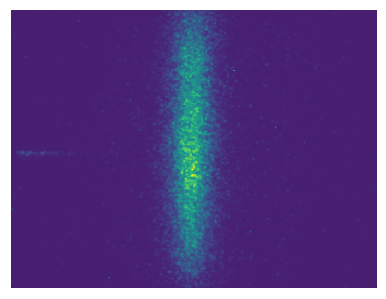

In [23]:
#plotting and filtering the image
image = np.reshape(image,(image_height,image_width))
filtered_image = medfilt(image)

fig = plt.figure(figsize=(image_width/100,image_height/100))

ax = fig.add_subplot(111)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)
plt.imshow(filtered_image)
plt.savefig('image.png',bbox_inches='tight')
